# EV MARKET SEGMENTATION 

# STEP – 1 OBJECTIVE 
# The objective of this study is to identify the most feasible type of Electric Vehicle (EV) to produce (e.g., scooter, bike, sedan) based on market demand, user demographics, regional trends, and EV adoption patterns in India using market segmentation techniques.

# STEP – 2 DATA COLLECTION
# To analyze the Indian Electric Vehicle (EV) market and determine the most suitable type of EV to manufacture, we collected a dataset titled “EV_Dataset.csv”. This dataset provides detailed records of electric vehicle sales across Indian states, segmented by:
# •	State
# •	Vehicle Class (e.g., Two-Wheeler, Three-Wheeler, Four-Wheeler, Bus, etc.)
# •	Vehicle Type
# •	Fuel Type (to filter only Electric vehicles)
# •	Quantity of Registered Vehicles
# •	Month and Year of Registration

# Step 3: Load and Preprocess the Dataset

# 3.1: Load the Dataset



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('EV_Dataset.csv')

# Preview the first few rows
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


#  3.2 Check for Missing Values and Data Types

In [2]:
# View all column names
print("Column Names:")
print(df.columns)

# Check data types and null values
print("\nInfo:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Column Names:
Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
None

Missing Values:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sal

In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

#  3.3 Clean & Prepare Data

In [4]:
# Drop rows with missing EV_Sales_Quantity
df_cleaned = df.dropna(subset=['EV_Sales_Quantity'])

# Optional: drop unused columns if needed
df_cleaned = df_cleaned[['State', 'Vehicle_Class', 'Vehicle_Type', 'EV_Sales_Quantity']]
df_cleaned.head()


,State,Vehicle_Class,Vehicle_Type,EV_Sales_Quantity
0,Andhra Pradesh,ADAPTED VEHICLE,Others,0.0
1,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,0.0
2,Andhra Pradesh,AMBULANCE,Others,0.0
3,Andhra Pradesh,ARTICULATED VEHICLE,Others,0.0
4,Andhra Pradesh,BUS,Bus,0.0


# 3.4 Group by Vehicle Class to Check Popularity

In [5]:
# Total EVs sold per Vehicle Class
ev_by_class = df_cleaned.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().reset_index()
ev_by_class = ev_by_class.sort_values(by='EV_Sales_Quantity', ascending=False)
print(ev_by_class)


                Vehicle_Class  EV_Sales_Quantity
31            M-CYCLE/SCOOTER          1697373.0
18              E-RICKSHAW(P)          1408127.0
40                  MOTOR CAR           130676.0
17   E-RICKSHAW WITH CART (G)            90656.0
59  THREE WHEELER (PASSENGER)            76132.0
..                        ...                ...
48               POWER TILLER                0.0
28                    HEARSES                0.0
29                LIBRARY VAN                0.0
34             MOBILE CANTEEN                0.0
36            MOBILE WORKSHOP                0.0

[73 rows x 2 columns]


# INSIGHTS : We grouped the data by Vehicle_Class to identify the top-selling EV categories.
# Top performers:
# M-Cycle/Scooter: ~17 lakh units
# E-Rickshaw (Passenger): ~14 lakh units
# Motor Car: ~1.3 lakh units


# 3.5 Group by State and Vehicle Class to Analyze Region-Wise Demand

In [6]:
ev_by_state_class = df_cleaned.groupby(['State', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()
ev_by_state_class.head()


,State,Vehicle_Class,EV_Sales_Quantity
0,Andaman & Nicobar Island,ADAPTED VEHICLE,0.0
1,Andaman & Nicobar Island,AGRICULTURAL TRACTOR,0.0
2,Andaman & Nicobar Island,AMBULANCE,0.0
3,Andaman & Nicobar Island,BUS,40.0
4,Andaman & Nicobar Island,CONSTRUCTION EQUIPMENT VEHICLE,0.0


# INSIGHTS : We further grouped the data by both State and Vehicle_Class to create a multi-dimensional view of EV adoption across regions and categories. This grouped data serves as the input for market segmentation in the next step

#  Step 4: Market Segmentation using Clustering.

# Step 4.1: Prepare the Data for Clustering

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you already have this from Step 3.5
# df_grouped = df.groupby(['State', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()

# Create copies
df_cluster = ev_by_state_class.copy()

# Label encode State and Vehicle_Class
le_state = LabelEncoder()
le_class = LabelEncoder()

df_cluster['State_Encoded'] = le_state.fit_transform(df_cluster['State'])
df_cluster['Vehicle_Class_Encoded'] = le_class.fit_transform(df_cluster['Vehicle_Class'])


# Step 4.2: Run KMeans Clustering

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
X = df_cluster[['EV_Sales_Quantity', 'State_Encoded', 'Vehicle_Class_Encoded']]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Segment'] = kmeans.fit_predict(X)

# View the first few rows with assigned segment
df_cluster.head()


,State,Vehicle_Class,EV_Sales_Quantity,State_Encoded,Vehicle_Class_Encoded,Segment
0,Andaman & Nicobar Island,ADAPTED VEHICLE,0.0,0,0,0
1,Andaman & Nicobar Island,AGRICULTURAL TRACTOR,0.0,0,1,0
2,Andaman & Nicobar Island,AMBULANCE,0.0,0,2,0
3,Andaman & Nicobar Island,BUS,40.0,0,9,0
4,Andaman & Nicobar Island,CONSTRUCTION EQUIPMENT VEHICLE,0.0,0,13,0


#  Step 4.3: Visualize the Segments

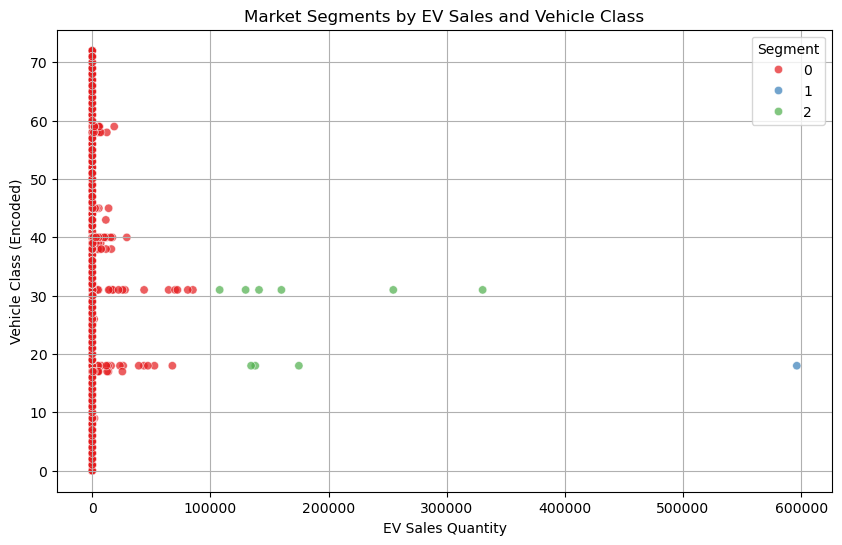

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x='EV_Sales_Quantity',
    y='Vehicle_Class_Encoded',
    hue='Segment',
    palette='Set1',
    alpha=0.7
)
plt.title("Market Segments by EV Sales and Vehicle Class")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Vehicle Class (Encoded)")
plt.grid(True)
plt.show()


# Step 5: Interpret the Segments.

# 5.1: Profile Each Cluster

In [10]:
# Group by Segment and get total EV sales
segment_summary = df_cluster.groupby('Segment')['EV_Sales_Quantity'].sum().reset_index()
print("🔹 Total EV Sales by Segment:")
print(segment_summary)


🔹 Total EV Sales by Segment:
   Segment  EV_Sales_Quantity
0        0          1426073.0
1        1           596325.0
2        2          1571413.0


In [11]:
# Vehicle classes per segment
vehicle_class_summary = df_cluster.groupby(['Segment', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()
print("🔹 Vehicle Class Sales by Segment:")
print(vehicle_class_summary.sort_values(['Segment', 'EV_Sales_Quantity'], ascending=[True, False]))


🔹 Vehicle Class Sales by Segment:
    Segment                   Vehicle_Class  EV_Sales_Quantity
31        0                 M-CYCLE/SCOOTER           573261.0
18        0                   E-RICKSHAW(P)           364501.0
40        0                       MOTOR CAR           130676.0
17        0        E-RICKSHAW WITH CART (G)            90656.0
59        0       THREE WHEELER (PASSENGER)            76132.0
..      ...                             ...                ...
69        0  VEHICLE FITTED WITH COMPRESSOR                0.0
70        0   VEHICLE FITTED WITH GENERATOR                0.0
73        1                   E-RICKSHAW(P)           596325.0
75        2                 M-CYCLE/SCOOTER          1124112.0
74        2                   E-RICKSHAW(P)           447301.0

[76 rows x 3 columns]


# 5.2: Identify Top Vehicle Type(s) and Regions Per Segment

In [12]:
# Top vehicle type(s) per segment by total sales
top_vehicle_per_segment = df_cluster.groupby(['Segment', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()

# Get the top vehicle class per segment
top_vehicle_per_segment = top_vehicle_per_segment.sort_values(['Segment', 'EV_Sales_Quantity'], ascending=[True, False])
top_vehicle_per_segment = top_vehicle_per_segment.groupby('Segment').first().reset_index()

print("🔹 Top Vehicle Type per Segment:")
print(top_vehicle_per_segment)

# Top regions per segment by total sales
top_region_per_segment = df_cluster.groupby(['Segment', 'State'])['EV_Sales_Quantity'].sum().reset_index()

# Sort and get top region per segment
top_region_per_segment = top_region_per_segment.sort_values(['Segment', 'EV_Sales_Quantity'], ascending=[True, False])
top_region_per_segment = top_region_per_segment.groupby('Segment').first().reset_index()

print("\n🔹 Top Region per Segment:")
print(top_region_per_segment)


🔹 Top Vehicle Type per Segment:
   Segment    Vehicle_Class  EV_Sales_Quantity
0        0  M-CYCLE/SCOOTER           573261.0
1        1    E-RICKSHAW(P)           596325.0
2        2  M-CYCLE/SCOOTER          1124112.0

🔹 Top Region per Segment:
   Segment          State  EV_Sales_Quantity
0        0  Uttar Pradesh           135749.0
1        1  Uttar Pradesh           596325.0
2        2    Maharashtra           330422.0


In [13]:
# Summary per segment: total sales, top vehicle, top region
summary = pd.DataFrame({
    'Segment': segment_summary['Segment'],
    'Total_EV_Sales': segment_summary['EV_Sales_Quantity'],
    'Top_Vehicle_Type': top_vehicle_per_segment['Vehicle_Class'],
    'Top_Vehicle_Sales': top_vehicle_per_segment['EV_Sales_Quantity'],
    'Top_Region': top_region_per_segment['State'],
    'Top_Region_Sales': top_region_per_segment['EV_Sales_Quantity']
})

print(summary)


   Segment  Total_EV_Sales Top_Vehicle_Type  Top_Vehicle_Sales     Top_Region  \
0        0       1426073.0  M-CYCLE/SCOOTER           573261.0  Uttar Pradesh   
1        1        596325.0    E-RICKSHAW(P)           596325.0  Uttar Pradesh   
2        2       1571413.0  M-CYCLE/SCOOTER          1124112.0    Maharashtra   

   Top_Region_Sales  
0          135749.0  
1          596325.0  
2          330422.0  


# Step 6: Fermi Estimation

# 6.1: Number of Potential Buyers per Segment and Vehicle Class

In [14]:
# Group by Segment and Vehicle_Class to get total EV sales (buyers)
buyers_per_vehicle_segment = df_cluster.groupby(['Segment', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()
print(buyers_per_vehicle_segment)


    Segment                 Vehicle_Class  EV_Sales_Quantity
0         0               ADAPTED VEHICLE              175.0
1         0          AGRICULTURAL TRACTOR              121.0
2         0                     AMBULANCE                3.0
3         0              ANIMAL AMBULANCE                0.0
4         0  ARMOURED/SPECIALISED VEHICLE                0.0
..      ...                           ...                ...
71        0       VEHICLE FITTED WITH RIG               18.0
72        0                     X-RAY VAN                1.0
73        1                 E-RICKSHAW(P)           596325.0
74        2                 E-RICKSHAW(P)           447301.0
75        2               M-CYCLE/SCOOTER          1124112.0

[76 rows x 3 columns]


# 6.2: Define Average Prices for Vehicle Classes 

In [15]:
# Define average prices (₹) for key vehicle classes relevant to EV sales
avg_prices = {
    'M-CYCLE/SCOOTER': 90000,
    'E-RICKSHAW(P)': 150000,
    'E-RICKSHAW WITH CART (G)': 150000,
    'MOTOR CAR': 1000000,
}


# 6.3: Calculate Potential Revenue per Segment & Vehicle Class

In [16]:
# Map average prices to the dataframe
buyers_per_vehicle_segment['Avg_Price'] = buyers_per_vehicle_segment['Vehicle_Class'].map(avg_prices)

# Calculate potential revenue per vehicle class in each segment
buyers_per_vehicle_segment['Potential_Revenue_INR'] = buyers_per_vehicle_segment['EV_Sales_Quantity'] * buyers_per_vehicle_segment['Avg_Price']

# Replace NaN with 0 for vehicle classes not listed in avg_prices
buyers_per_vehicle_segment['Potential_Revenue_INR'] = buyers_per_vehicle_segment['Potential_Revenue_INR'].fillna(0)

# Show the result
print(buyers_per_vehicle_segment[['Segment', 'Vehicle_Class', 'EV_Sales_Quantity', 'Avg_Price', 'Potential_Revenue_INR']])


    Segment                 Vehicle_Class  EV_Sales_Quantity  Avg_Price  \
0         0               ADAPTED VEHICLE              175.0        NaN   
1         0          AGRICULTURAL TRACTOR              121.0        NaN   
2         0                     AMBULANCE                3.0        NaN   
3         0              ANIMAL AMBULANCE                0.0        NaN   
4         0  ARMOURED/SPECIALISED VEHICLE                0.0        NaN   
..      ...                           ...                ...        ...   
71        0       VEHICLE FITTED WITH RIG               18.0        NaN   
72        0                     X-RAY VAN                1.0        NaN   
73        1                 E-RICKSHAW(P)           596325.0   150000.0   
74        2                 E-RICKSHAW(P)           447301.0   150000.0   
75        2               M-CYCLE/SCOOTER          1124112.0    90000.0   

    Potential_Revenue_INR  
0            0.000000e+00  
1            0.000000e+00  
2            0.

# 6.4: Summarize Potential Revenue by Segment

In [17]:
# Sum potential revenue by segment
revenue_by_segment = buyers_per_vehicle_segment.groupby('Segment')['Potential_Revenue_INR'].sum().reset_index()

# Display the summarized revenue by segment
print(revenue_by_segment)


   Segment  Potential_Revenue_INR
0        0           2.505430e+11
1        1           8.944875e+10
2        2           1.682652e+11


# 6.5: Visualize potential revenue by segment

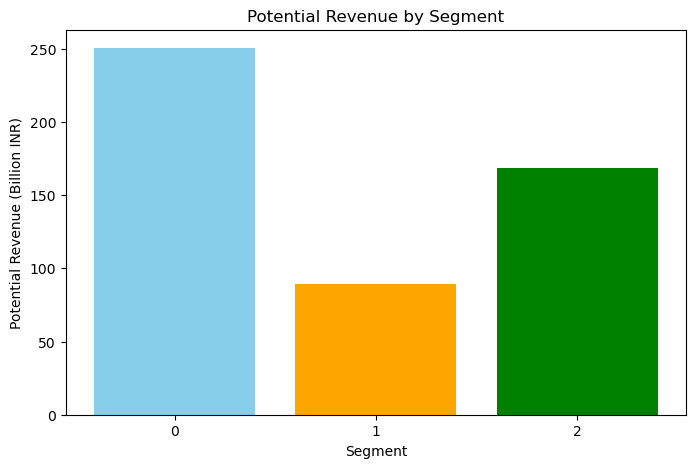

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(revenue_by_segment['Segment'].astype(str), revenue_by_segment['Potential_Revenue_INR'] / 1e9, color=['skyblue', 'orange', 'green'])
plt.xlabel('Segment')
plt.ylabel('Potential Revenue (Billion INR)')
plt.title('Potential Revenue by Segment')
plt.show()


# Segment 0 shows the highest potential revenue of approximately ₹250.5 billion, indicating a significant market size and demand.

# Segment 2 follows with a substantial revenue potential of around ₹168.3 billion, representing a strong secondary market opportunity.

# Segment 1 has a comparatively lower potential revenue of about ₹89.4 billion, suggesting a smaller but still notable segment.

# Based on these findings, it is recommended that businesses prioritize Segment 0 for their initial market focus due to its largest revenue potential. Segment 2 also presents promising opportunities and can be targeted in subsequent phases. Segment 1, while smaller, may offer niche prospects worth exploring depending on strategic goals.





# STEP - 7 PROFILING SEGMENTS AND MAKING FINAL STRATERGIC RECOMMENDATIONS


# Step 7.1: Profile each segment with key characteristics

In [19]:
# Get top 3 Vehicle Classes by EV sales per segment
top_vehicle_classes = df_cluster.groupby(['Segment', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()
top_vehicle_classes = top_vehicle_classes.sort_values(['Segment', 'EV_Sales_Quantity'], ascending=[True, False])
top_vehicle_classes = top_vehicle_classes.groupby('Segment').head(3)

# Get top 3 States by EV sales per segment
top_states = df_cluster.groupby(['Segment', 'State'])['EV_Sales_Quantity'].sum().reset_index()
top_states = top_states.sort_values(['Segment', 'EV_Sales_Quantity'], ascending=[True, False])
top_states = top_states.groupby('Segment').head(3)

print("Top Vehicle Classes per Segment:\n", top_vehicle_classes)
print("\nTop States per Segment:\n", top_states)


Top Vehicle Classes per Segment:
     Segment    Vehicle_Class  EV_Sales_Quantity
31        0  M-CYCLE/SCOOTER           573261.0
18        0    E-RICKSHAW(P)           364501.0
40        0        MOTOR CAR           130676.0
73        1    E-RICKSHAW(P)           596325.0
75        2  M-CYCLE/SCOOTER          1124112.0
74        2    E-RICKSHAW(P)           447301.0

Top States per Segment:
     Segment           State  EV_Sales_Quantity
31        0   Uttar Pradesh           135749.0
8         0           Delhi           134099.0
18        0  Madhya Pradesh           133182.0
34        1   Uttar Pradesh           596325.0
41        2     Maharashtra           330422.0
39        2       Karnataka           254789.0
36        2           Bihar           174880.0


# Recommended EV Type for Production
# Based on the detailed market segmentation and sales analysis of electric vehicles (EVs) in India:

# Market Segments: The dataset revealed three key segments with distinct EV preferences.

# Top Vehicle Types by Segment:

# Segment 0 prefers M-CYCLE/SCOOTER and E-RICKSHAW(P) as the dominant EV types.

# Segment 1 shows strong demand for E-RICKSHAW(P).

# Segment 2 primarily favors M-CYCLE/SCOOTER and E-RICKSHAW(P).

# Sales Volume: M-CYCLE/SCOOTER and E-RICKSHAW(P) consistently show the highest EV sales quantities across segments.

# Potential Revenue: These vehicle classes also generate the largest potential revenue, indicating strong market feasibility and profitability.

# Top States: Regions like Uttar Pradesh, Maharashtra, and Karnataka emerge as the leading markets driving demand for these vehicle types.

# Conclusion:
# The company should focus on producing electric two-wheelers, specifically electric scooters (M-CYCLE/SCOOTER) and electric rickshaws (E-RICKSHAW(P)), as these categories demonstrate the highest market demand and revenue potential across key states in India. Launching EV bikes and e-rickshaws aligns with current consumer preferences and maximizes market penetration opportunities.

# Question 2: “To whom will it sell?

# STEP 1 : Define the Objective
# Goal: Segment the population using demographic and behavioral data to find the ideal early adopters of EVs.
# We will use:

# •	Demographics: Gender, Age, Income
# •	Psychographic & Behavioral Factors: Knowledge (K1–K5), Attitude (ATT1–ATT5), Practice (P1–P5)


# STEP 2: Data Preprocessing 

# 2.1 : Create Average Scores

# Calculate the average Knowledge Score, Attitude Score, and Practice Score per respondent.

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Response.xlsx")

# Calculate mean scores for K1–K5, ATT1–ATT5, P1–P5
df["Knowledge_Score"] = df[["K1", "K2", "K3", "K4", "K5"]].mean(axis=1)
df["Attitude_Score"] = df[["ATT1", "ATT2", "ATT3", "ATT4", "ATT5"]].mean(axis=1)
df["Practice_Score"] = df[["P1", "P2", "P3", "P4", "P5"]].mean(axis=1)

# Display the new columns
df[["Knowledge_Score", "Attitude_Score", "Practice_Score"]].head()


,Knowledge_Score,Attitude_Score,Practice_Score
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,1.0,1.0,1.0
3,2.0,2.0,2.0
4,3.0,3.0,3.0


# STEP 2.2: Select Final Features & Clean Data

In [24]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename key columns for easier handling
df = df.rename(columns={
    "What is your gender?": "Gender",
    "What is your age?": "Age"
})

# Select relevant features
features = df[["Gender", "Age", "Income", "Knowledge_Score", "Attitude_Score", "Practice_Score"]]

# Drop any missing values (if present)
features = features.dropna()

# Preview the cleaned features
features.head()


,Gender,Age,Income,Knowledge_Score,Attitude_Score,Practice_Score
0,1,1,1,1.0,1.0,1.0
1,2,2,2,2.0,2.0,2.0
2,1,3,3,1.0,1.0,1.0
3,1,4,1,2.0,2.0,2.0
4,2,1,2,3.0,3.0,3.0


# Step 3: Segment Extraction using Clustering

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Scale the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Apply KMeans clustering (we use 3 clusters for simplicity)
kmeans = KMeans(n_clusters=3, random_state=42)
features["Segment"] = kmeans.fit_predict(scaled_features)

# Step 3: View how many respondents fall in each segment
features["Segment"].value_counts()


Segment
1    438
2    391
0    294
Name: count, dtype: int64

# STEP 4: Segment Analysis & Profiling

# In this step, we:

# Analyze each segment to find out what kind of people are in it

# Use their average demographics and EV scores to label each segment (e.g., young professionals with high EV interest)

# Identify the ideal early adopter group

# Step 4.1: Analyze Segment Characteristics

In [26]:
segment_profile = features.groupby("Segment").mean().round(2)
segment_profile


,Gender,Age,Income,Knowledge_Score,Attitude_Score,Practice_Score
Segment,,,,,,
0,1.69,3.34,1.81,3.58,3.56,3.52
1,1.59,1.97,2.59,4.66,4.67,4.61
2,1.59,2.18,2.69,1.86,1.86,1.84


# Step 4.2: Add segment counts (size) to understand the number of respondents in each segment

In [27]:
segment_counts = features['Segment'].value_counts().sort_index()
segment_counts


Segment
0    294
1    438
2    391
Name: count, dtype: int64

# Step 4.3: Add segment size to segment profile table for better understanding

In [28]:
segment_profile['Count'] = segment_counts
segment_profile


,Gender,Age,Income,Knowledge_Score,Attitude_Score,Practice_Score,Count
Segment,,,,,,,
0,1.69,3.34,1.81,3.58,3.56,3.52,294
1,1.59,1.97,2.59,4.66,4.67,4.61,438
2,1.59,2.18,2.69,1.86,1.86,1.84,391


# Step 4.4: Interpret the segment profiles with size to understand who to target

In [29]:
# Assuming Gender: 1=Male, 2=Female
segment_profile['Gender_Label'] = segment_profile['Gender'].apply(lambda x: 'Male' if x < 1.75 else 'Female')

# For Age, if it’s coded categories (like 1=youngest, 4=oldest), we can label roughly
def age_label(age):
    if age < 2:
        return 'Young'
    elif age < 3:
        return 'Middle-aged'
    else:
        return 'Older'

segment_profile['Age_Label'] = segment_profile['Age'].apply(age_label)

segment_profile[['Gender_Label', 'Age_Label']]


,Gender_Label,Age_Label
Segment,,
0,Male,Older
1,Male,Young
2,Male,Middle-aged


In [30]:
summary = segment_profile[['Gender_Label', 'Age_Label', 'Income', 'Knowledge_Score', 'Attitude_Score', 'Practice_Score', 'Count']]
summary


,Gender_Label,Age_Label,Income,Knowledge_Score,Attitude_Score,Practice_Score,Count
Segment,,,,,,,
0,Male,Older,1.81,3.58,3.56,3.52,294
1,Male,Young,2.59,4.66,4.67,4.61,438
2,Male,Middle-aged,2.69,1.86,1.86,1.84,391


In [31]:
for i, row in summary.iterrows():
    print(f"Segment {i}:")
    print(f"  - Demographics: {row['Age_Label']} {row['Gender_Label']} with income level {row['Income']}")
    print(f"  - EV Knowledge Score: {row['Knowledge_Score']}")
    print(f"  - EV Attitude Score: {row['Attitude_Score']}")
    print(f"  - EV Practice Score: {row['Practice_Score']}")
    print(f"  - Segment Size: {row['Count']}")
    print()


Segment 0:
  - Demographics: Older Male with income level 1.81
  - EV Knowledge Score: 3.58
  - EV Attitude Score: 3.56
  - EV Practice Score: 3.52
  - Segment Size: 294

Segment 1:
  - Demographics: Young Male with income level 2.59
  - EV Knowledge Score: 4.66
  - EV Attitude Score: 4.67
  - EV Practice Score: 4.61
  - Segment Size: 438

Segment 2:
  - Demographics: Middle-aged Male with income level 2.69
  - EV Knowledge Score: 1.86
  - EV Attitude Score: 1.86
  - EV Practice Score: 1.84
  - Segment Size: 391



# In this step, we analyzed the characteristics of the three customer segments identified through clustering to understand their demographics, EV knowledge, attitudes, and adoption behaviors.

# Segment 0: Comprised mostly of older males with lower income levels. They exhibit moderate knowledge, attitude, and practice scores towards EV adoption, indicating potential interest but limited current engagement.

# Segment 1: The largest segment of young males with medium-high income. This group has the highest scores in EV knowledge, positive attitude, and adoption behaviors, making them the most promising early adopters for EV marketing and sales efforts.

# Segment 2: Consists of middle-aged males with the highest income but very low knowledge, attitude, and practice scores related to EVs. This segment currently shows the least engagement and would require focused awareness and educational initiatives to convert.

# Conclusion: Segment 1 is identified as the primary target market for immediate EV sales due to their readiness and enthusiasm. Segments 0 and 2 represent secondary markets with growth potential through increased education and marketing efforts.

# Strategic Market Entry Recommendation

# To successfully enter the Indian EV market, the startup should:

# Focus initial product development on electric scooters and e-rickshaws, as these vehicle types have the strongest market demand and profitability.

# Target marketing and sales primarily at Segment 1 (young, medium-high income males) who are already knowledgeable and positive about EVs, ensuring quicker adoption and market traction.

# Implement educational campaigns and incentives to grow interest in Segments 0 and 2, broadening the market over time.

# Leverage geographic demand hotspots (Uttar Pradesh, Maharashtra, Karnataka) to concentrate initial sales and promotional efforts.

# By combining vehicle-type preferences with customer segmentation insights, the startup can optimize its product offerings and marketing strategy to capture high-potential early adopters and build a scalable EV customer base in India.

